In [92]:
import numpy as np
import matplotlib.pyplot as plt

In [114]:
## ------------- Problem Setup ------------ ##
np.random.seed(0)
n = 100

x = np.max([np.random.normal(0, 1, n), np.zeros(n)], axis=0)
x = x / np.linalg.norm(x, 2)

## ------------- Helper Functions ------------ ##
def generate_data(n,m,x):
    A = np.random.randn(m,n)
    y = np.dot(A, x)
    return A, y

## ------------- Projection Functions ------------ ##

def project_B1(x):
    """
    Project x onto the set B1 = {x: x >= 0}
    """
    return np.max([np.zeros_like(x), x], axis=0)

def project_B2(x):
    """
    Project x onto the set B2 = {x: ||x||_2 <= 1}
    """
    return x / np.linalg.norm(x, 2)

def project_y(x, A, y):
    """
    Project x onto the set {x | y = Ax}
    """
    I = np.eye(len(x))
    return (I - A.T @ np.linalg.inv(A @ A.T) @ A) @ x  + A.T @ np.linalg.inv(A @ A.T) @ y


def optimize(x_init, A, y, iters = 100):
    """
    Run alternating projection for iters 
    """
    # create a matrix to store the results
    x = np.zeros((len(x_init), iters))
    x[:,0] = x_init
    for i in np.arange(0,iters-1):
        p1 = project_B1(x[:,i])
        p2 = project_B2(x[:,i])
        p3 = project_y(x[:,i], A, y)
        x[:,i+1] = [p1, p2, p3][np.argmax([np.linalg.norm(p1 - x[:,i], 2), 
                                           np.linalg.norm(p2 - x[:,i], 2), 
                                           np.linalg.norm(p3 - x[:,i], 2)])]
    return x

In [128]:
x_init = np.random.standard_normal(n)
iters = 50

## ------------- m = 50 ------------ ##
A50, y50 = generate_data(n, 50, x)
x50 = optimize(x_init, A50, y50, iters)
x50_norm = [np.linalg.norm(x50[:,i] - x, 2) for i in range(len(x50[0]))]


# ## ------------- m = 80 ------------ ##
A80, y80 = generate_data(n, 80, x)
x80 = optimize(x_init, A80, y80, iters)
x80_norm = [np.linalg.norm(x80[:,i] - x, 2) for i in range(len(x80[0]))]


# ## ------------- m = 100 ------------ ##
A100, y100 = generate_data(n, 100, x)
x100 = optimize(x_init, A100, y100, iters)
x100_norm = [np.linalg.norm(x100[:,i] - x, 2) for i in range(len(x100[0]))]


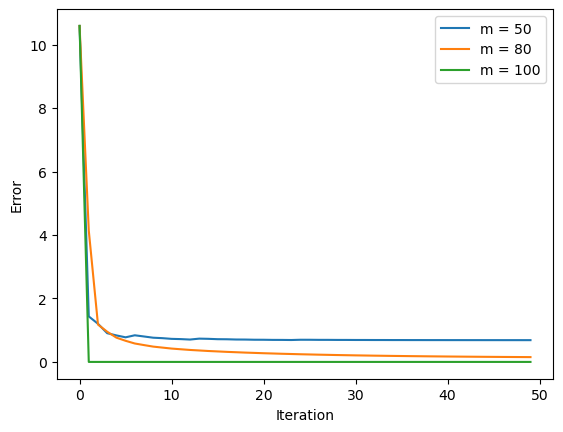

In [132]:
fig, ax = plt.subplots()
ax.plot(x50_norm, label='m = 50')
ax.plot(x80_norm, label='m = 80')
ax.plot(x100_norm, label='m = 100')
ax.set_xlabel('Iteration')
ax.set_ylabel('Error')
ax.legend()
fig.savefig("hw2_q2b")

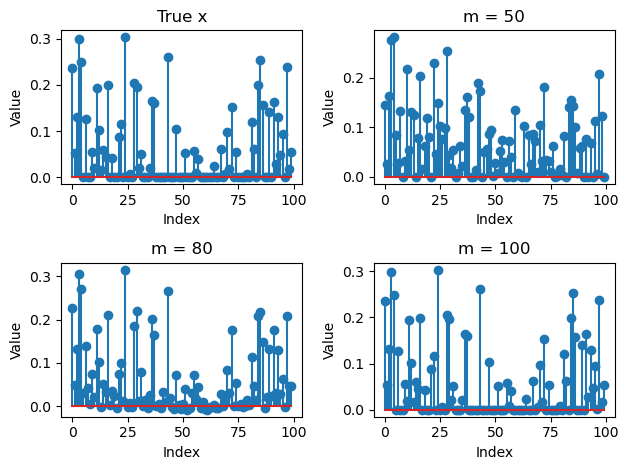

In [131]:
fig, ax = plt.subplots(2,2)
ax[0,0].stem(x)
ax[0,1].stem(x50[:,-1])
ax[1,0].stem(x80[:,-1])
ax[1,1].stem(x100[:,-1])

# set x-axis and y-axis labels 
ax[0,0].set(xlabel='Index', ylabel='Value', title='True x')
ax[0,1].set(xlabel='Index', ylabel='Value', title='m = 50')
ax[1,0].set(xlabel='Index', ylabel='Value', title='m = 80')
ax[1,1].set(xlabel='Index', ylabel='Value', title='m = 100')

fig.tight_layout()

fig.savefig("hw2_q2b_stem")

